In [60]:
import pandas as pd
train=pd.read_csv('train.csv')

In [111]:
test=pd.read_csv('test.csv')
#test['id']=sto+'_'+dep+'_'+dat
idx=test['Store'].astype(str)+'_'+test['Dept'].astype(str)+test['Date'].astype(str)
#idx=test.id.values.astype(str)


In [3]:
pd.isnull(train).sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [4]:
pd.isnull(test).sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1        88958
MarkDown2       102103
MarkDown3        93549
MarkDown4        94183
MarkDown5        88716
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [5]:
train[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]=train[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [86]:
test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]=test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [112]:
train=train.sort_values(by='Date')
test=test.sort_values(by='Date')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
train['Type'].value_counts().round(1)

A    144559
B    109413
C     28479
Name: Type, dtype: int64

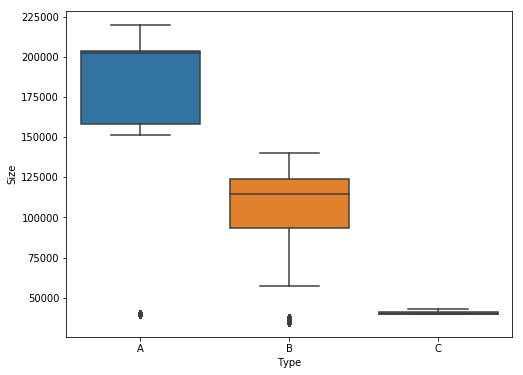

In [10]:
store_type=pd.concat([train['Type'],train['Size']],axis=1)
fig,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='Type',y='Size',data=store_type)

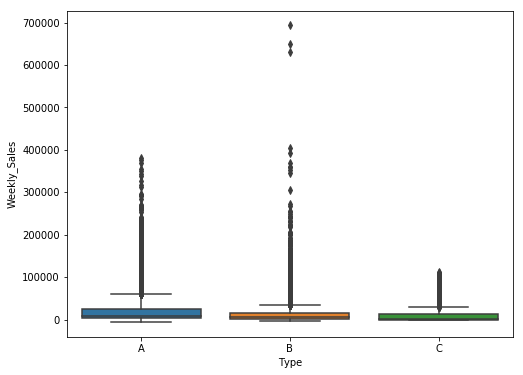

In [11]:
store_type=pd.concat([train['Type'],train['Weekly_Sales']],axis=1)
fig,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='Type',y='Weekly_Sales',data=store_type)

In [12]:
train[train.Type=='B'].Weekly_Sales.max()

693099.36

In [13]:
train[train.Weekly_Sales==693099.36]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
258653,10,72,2010-11-26,693099.36,True,55.33,3.162,0.0,0.0,0.0,0.0,0.0,126.669267,9.003,B,126512


In [14]:
train=train.drop(index=258653)

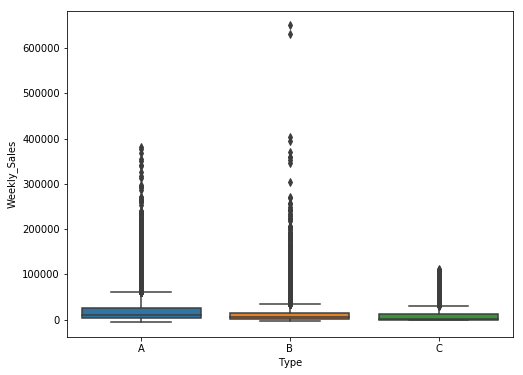

In [15]:
store_type=pd.concat([train['Type'],train['Weekly_Sales']],axis=1)
fig,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='Type',y='Weekly_Sales',data=store_type)

In [16]:
train[train.Weekly_Sales>500000]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
83588,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512
193697,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,0.0,58563.24,20.97,6386.86,140.421786,8.745,B,103681


In [17]:
train=train.drop(index=83588)
train=train.drop(index=193697)

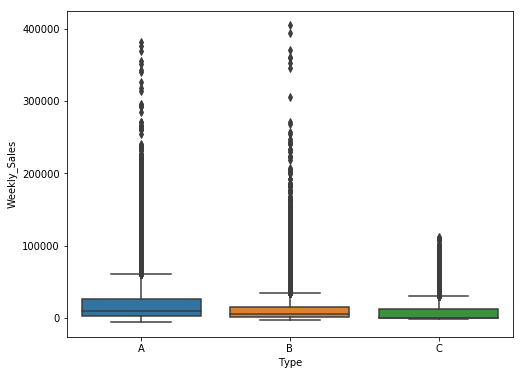

In [18]:
store_type=pd.concat([train['Type'],train['Weekly_Sales']],axis=1)
fig,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='Type',y='Weekly_Sales',data=store_type)

In [19]:
print('Sales on non-holiday: ',train[train['IsHoliday']==False]['Weekly_Sales'].count())

Sales on non-holiday:  262632


In [20]:
print('Sales on holiday: ',train[train['IsHoliday']==True]['Weekly_Sales'].count())

Sales on holiday:  19816


[]

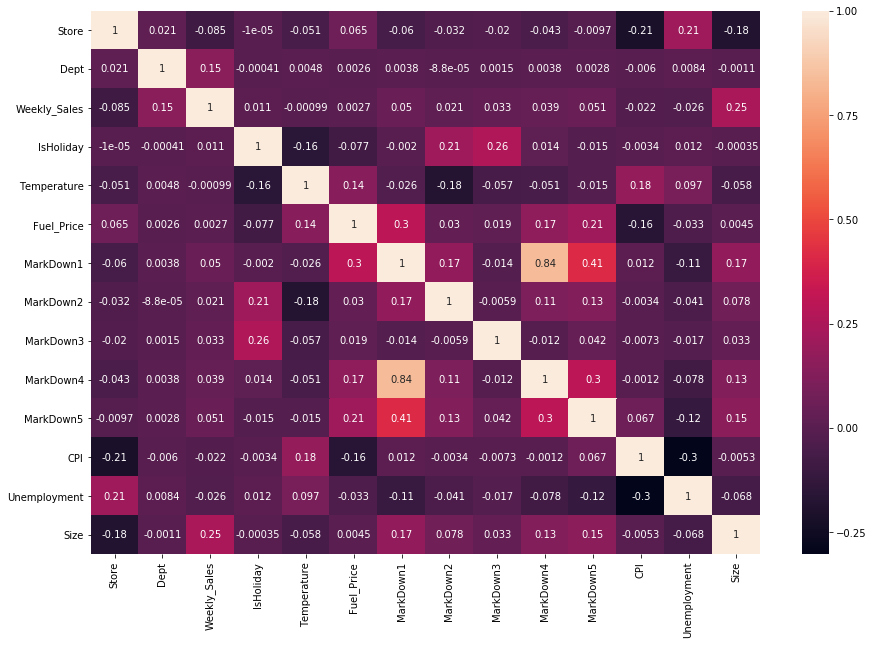

In [21]:
corr=train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.plot()

In [22]:
corr

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.021467,-0.085066,-0.000010,-0.050513,0.065321,-0.060487,-0.032139,-0.019921,-0.043214,-0.009691,-0.212092,0.208920,-0.182227
Dept,0.021467,1.000000,0.148300,-0.000411,0.004842,0.002551,0.003811,-0.000088,0.001512,0.003755,0.002794,-0.006006,0.008442,-0.001051
Weekly_Sales,-0.085066,0.148300,1.000000,0.011115,-0.000993,0.002665,0.050371,0.020586,0.033027,0.038560,0.050834,-0.022254,-0.026057,0.245071
IsHoliday,-0.000010,-0.000411,0.011115,1.000000,-0.156551,-0.077441,-0.002002,0.208909,0.263873,0.013522,-0.014606,-0.003388,0.012289,-0.000348
Temperature,-0.050513,0.004842,-0.000993,-0.156551,1.000000,0.141401,-0.026461,-0.178706,-0.056587,-0.050625,-0.014985,0.181116,0.097467,-0.058365
Fuel_Price,0.065321,0.002551,0.002665,-0.077441,0.141401,1.000000,0.298874,0.029512,0.019051,0.167835,0.213312,-0.163550,-0.033130,0.004519
MarkDown1,-0.060487,0.003811,0.050371,-0.002002,-0.026461,0.298874,1.000000,0.174052,-0.013778,0.838509,0.410636,0.011537,-0.106474,0.171186
MarkDown2,-0.032139,-0.000088,0.020586,0.208909,-0.178706,0.029512,0.174052,1.000000,-0.005877,0.113721,0.128500,-0.003352,-0.041080,0.078149
MarkDown3,-0.019921,0.001512,0.033027,0.263873,-0.056587,0.019051,-0.013778,-0.005877,1.000000,-0.011682,0.042063,-0.007288,-0.017383,0.032956
MarkDown4,-0.043214,0.003755,0.038560,0.013522,-0.050625,0.167835,0.838509,0.113721,-0.011682,1.000000,0.299325,-0.001199,-0.078281,0.128724


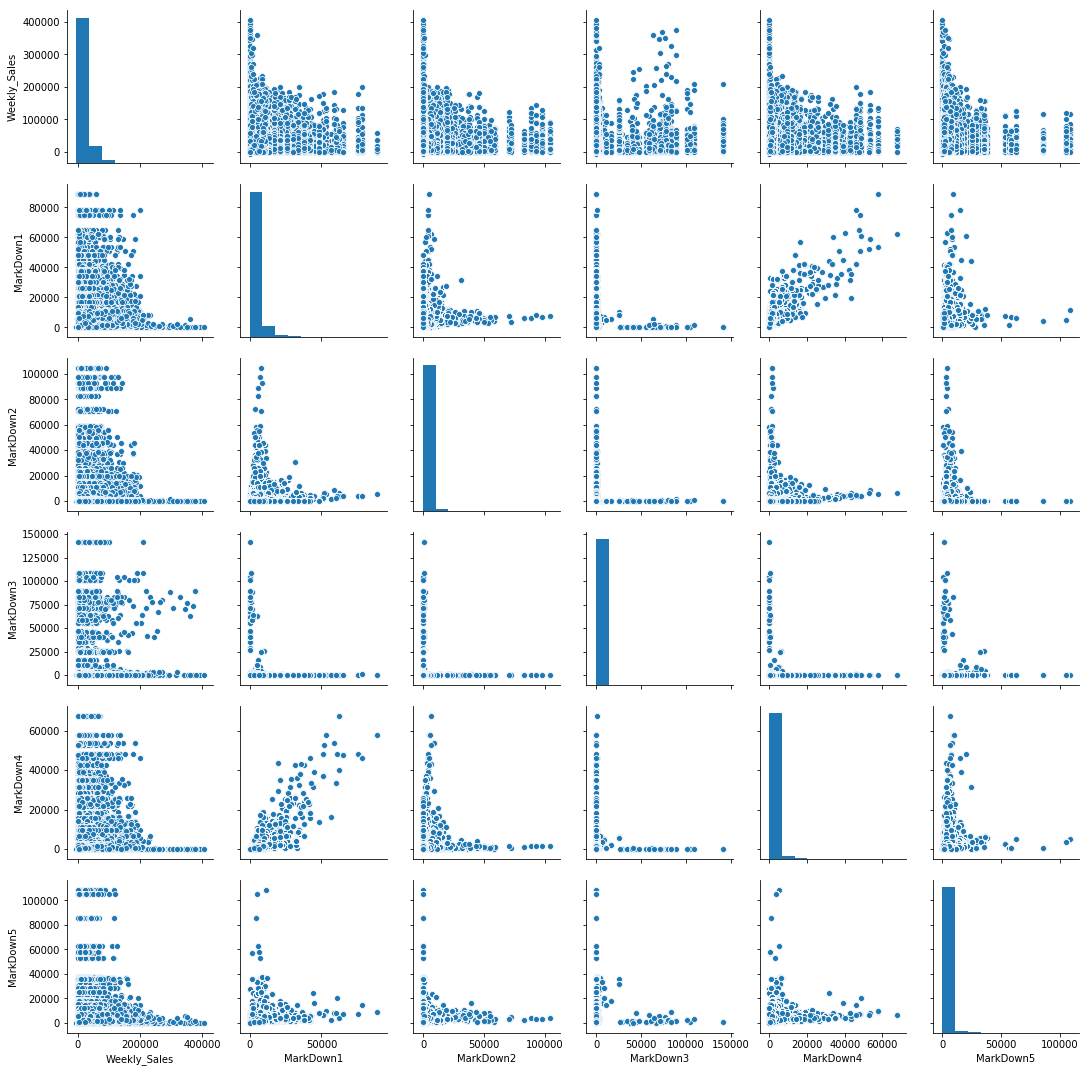

In [23]:
sns.pairplot(train.fillna(0), vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

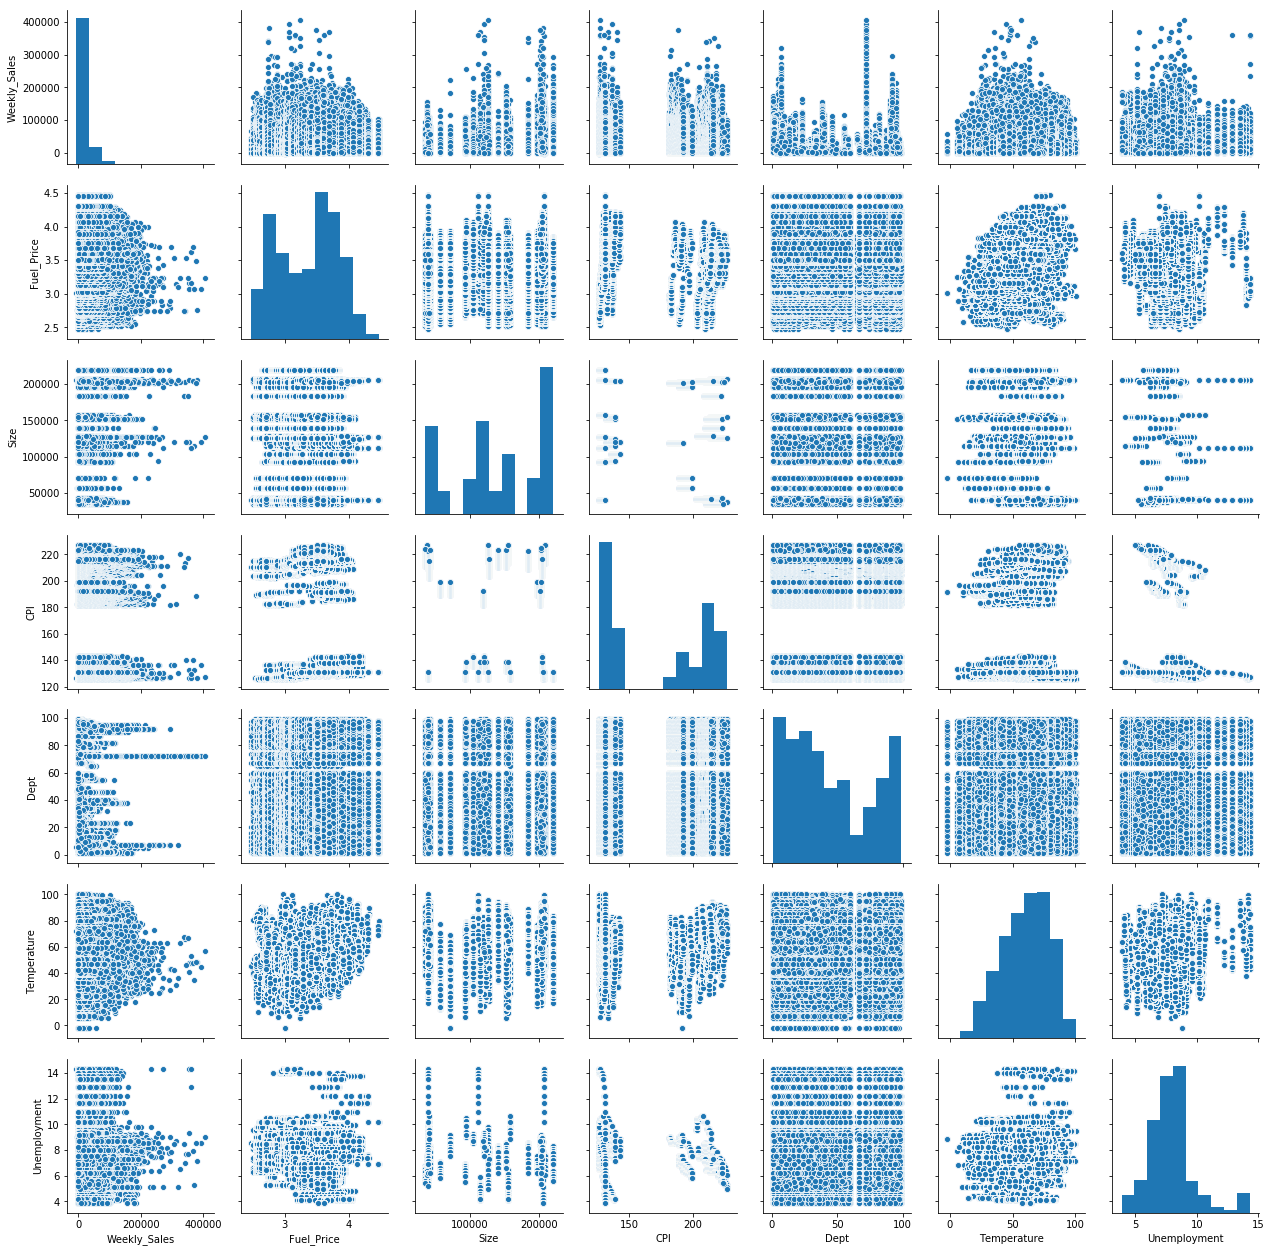

In [ ]:
sns.pairplot(train, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [113]:
train['Year']=pd.to_datetime(train['Date'],format='%Y-%m-%d').dt.year
test['Year']=pd.to_datetime(test['Date'],format='%Y-%m-%d').dt.year
train['Day']=pd.to_datetime(train['Date'],format='%Y-%m-%d').dt.day
test['Day']=pd.to_datetime(test['Date'],format='%Y-%m-%d').dt.day
train['Days to next Christmas']=(pd.to_datetime(train['Year'].astype(str)+'-12-31',format='%Y-%m-%d')-pd.to_datetime(train['Date'],format='%Y-%m-%d')).dt.days.astype(int)
test['Days to next Christmas']=(pd.to_datetime(test['Year'].astype(str)+'-12-31',format='%Y-%m-%d')-pd.to_datetime(test['Date'],format='%Y-%m-%d')).dt.days.astype(int)

In [25]:
train=train.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3','MarkDown4'])

In [114]:
test=test.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3','MarkDown4'])

In [27]:
train_tp=pd.get_dummies(train.Type)
train=pd.concat([train,train_tp],axis=1)
train=train.drop(columns='Type')

In [115]:
test_tp=pd.get_dummies(test.Type)
test=pd.concat([test,test_tp],axis=1)
test=test.drop(columns='Type')

In [29]:
train_y=train['Weekly_Sales']
train_x=train.drop(columns='Weekly_Sales')

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.20,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

/home/kamoo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kamoo/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/kamoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [32]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
y_train_pred=dt.predict(x_test)

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
print(mean_absolute_error(y_test,y_train_pred))
print(mean_squared_error(y_test,y_train_pred))
print(np.sqrt(mean_squared_error(y_test,y_train_pred)))
accuracy=dt.score(x_test,y_test)
accuracy

1911.5297541157727
23506580.328650985
4848.358518988771


0.9546247251971148

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_test)

In [35]:
print(mean_absolute_error(y_test,y_train_pred))
print(mean_squared_error(y_test,y_train_pred))
print(np.sqrt(mean_squared_error(y_test,y_train_pred)))
accuracy=knn.score(x_test,y_test)
accuracy

12402.801252841211
398978663.38040984
19974.45026478601


0.22984261265309777

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=400,max_depth=15,n_jobs=5)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_test)

In [37]:
print(mean_absolute_error(y_test,y_train_pred))
print(mean_squared_error(y_test,y_train_pred))
print(np.sqrt(mean_squared_error(y_test,y_train_pred)))
accuracy=rfr.score(x_test,y_test)
accuracy

1960.3205960217995
17024276.656933744
4126.048552420796


0.96713766014331

In [38]:
from xgboost.sklearn import XGBRegressor
xgb_clg=XGBRegressor(objective='reg:linear',nthread=4,n_estimators=500,max_depth=6,learning_rate=0.5)
xb=xgb_clg.fit(x_train,y_train)
y_train_pred=xb.predict(x_test)

/home/kamoo/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/kamoo/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


[14:48:00] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
print(mean_absolute_error(y_test,y_train_pred))
print(mean_squared_error(y_test,y_train_pred))
print(np.sqrt(mean_squared_error(y_test,y_train_pred)))
accuracy=xb.score(x_test,y_test)
accuracy

1999.6909837162038
13143369.77033102
3625.378569243634


0.9746290610192329

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(n_estimators=30,n_jobs=4)
etr.fit(x_train,y_train)
y_train_pred=etr.predict(x_test)

In [41]:
print(mean_absolute_error(y_test,y_train_pred))
print(mean_squared_error(y_test,y_train_pred))
print(np.sqrt(mean_squared_error(y_test,y_train_pred)))
accuracy=etr.score(x_test,y_test)
accuracy

1484.3044664129345
12082858.960028492
3476.0407017220746


0.9766761886224877

In [92]:
test=sc.transform(test)

/home/kamoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [93]:
etr_pred=etr.predict(test)
xgb_clf_pred=xb.predict(test)
rfr_pred=rfr.predict(test)
dt_pred = dt.predict(test)

In [94]:
final = (etr_pred + xgb_clf_pred + rfr_pred + dt_pred)/4.0

In [95]:
final

array([5325.54507689,  556.81537419,  371.87764026, ..., 7630.21592248,
       -612.86253866,  300.67501137])

In [96]:
etr_pred

array([5339.02833333,   23.711     ,  338.346     , ..., 7046.75      ,
         58.73133333,  438.81466667])

In [97]:
xgb_clf_pred

array([ 6012.22   ,  2103.253  ,   449.55478, ...,  5237.727  ,
       -2749.723  ,  -278.65988], dtype=float32)

In [98]:
rfr_pred

array([5088.75175937,   25.29756709,  192.60978197, ..., 8406.08663914,
        140.79141243,  535.6152604 ])

In [99]:
dt_pred

array([4862.18,   75.  ,  507.  , ..., 9830.3 ,   98.75,  506.93])

In [100]:
sto

array(['28', '18', '38', ..., '30', '32', '27'], dtype='<U21')

In [101]:
solution = pd.DataFrame({"id": idx, "prediction": final})
solution.to_csv("solution.csv", index=False)

In [116]:
idx

0         28_402012-01-06
1         18_932012-03-09
2          38_42011-05-27
3         29_332010-03-12
4         13_522010-10-29
5         13_492011-07-08
6         12_272012-04-27
7         10_492011-09-30
8         11_332011-06-24
9         26_822012-07-06
10         5_602012-09-14
11        31_362011-06-10
12        19_102010-03-05
13        34_972012-03-02
14          5_52011-07-01
15        23_382011-02-04
16        34_302010-04-23
17         36_12010-02-26
18         6_282010-03-12
19        37_972012-07-20
20         18_82010-12-24
21         2_462010-04-16
22        32_542012-03-09
23         9_902011-07-08
24         6_902012-02-17
25        34_352011-06-24
26        24_932010-02-26
27         1_252011-10-21
28        12_112012-01-27
29        13_562012-10-05
               ...       
139089    12_742010-10-01
139090    26_832012-05-04
139091    24_352012-08-10
139092    38_232011-06-10
139093    10_832012-05-18
139094    27_132010-06-25
139095     3_302011-07-22
139096    38